<a href="https://colab.research.google.com/github/ErnestWang31/syde182/blob/main/SYDE182_Good_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Preprocessing

In [ ]:
cardboard_df = pd.read_csv("Cardboard Data.csv")
foam_df = pd.read_csv("Foam Data.csv")

In [ ]:
# Drop columns of unneeded data
cardboard_df = cardboard_df.drop("epoc (ms)", axis=1)
cardboard_df = cardboard_df.drop("timestamp (-0400)", axis=1)
cardboard_df = cardboard_df.drop("x-axis (g)", axis=1)
cardboard_df = cardboard_df.drop("y-axis (g)", axis=1)

foam_df = foam_df.drop("epoc (ms)", axis=1)
foam_df = foam_df.drop("timestamp (-0400)", axis=1)
foam_df = foam_df.drop("x-axis (g)", axis=1)
foam_df = foam_df.drop("y-axis (g)", axis=1)

## Accelerometer Data Graph

<function matplotlib.pyplot.show(close=None, block=None)>

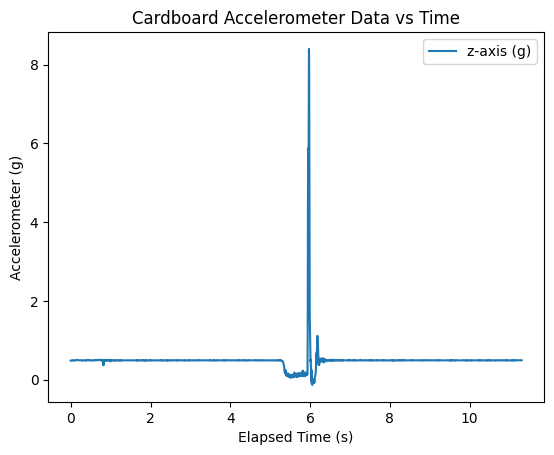

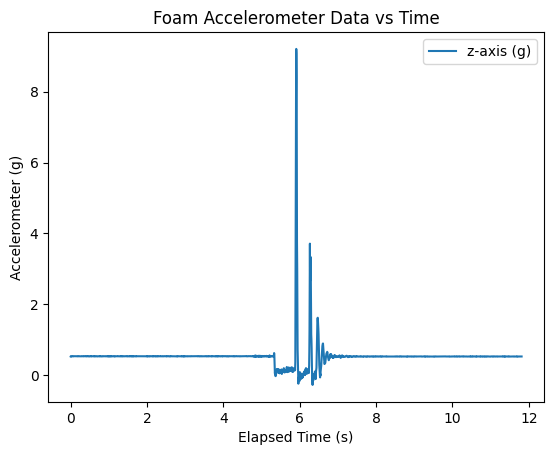

In [ ]:
cardboard_df.plot("elapsed (s)",  "z-axis (g)")

plt.title("Cardboard Accelerometer Data vs Time")
plt.xlabel("Elapsed Time (s)")
plt.ylabel("Accelerometer (g)")
plt.show

foam_df.plot("elapsed (s)",  "z-axis (g)")

plt.title("Foam Accelerometer Data vs Time")
plt.xlabel("Elapsed Time (s)")
plt.ylabel("Accelerometer (g)")
plt.show

## Acceleration Calculation

In [ ]:
# Convert data to acceleration

cardboard_df["accel"] = (cardboard_df["z-axis (g)"] - 0.486) * 9.81
cardboard_df["a_t"] = cardboard_df["accel"]*cardboard_df['elapsed (s)'].diff()

foam_df["accel"] = (foam_df["z-axis (g)"] - 0.522) * 9.81
foam_df["a_t"] = foam_df["accel"] * foam_df["elapsed (s)"].diff()

<function matplotlib.pyplot.show(close=None, block=None)>

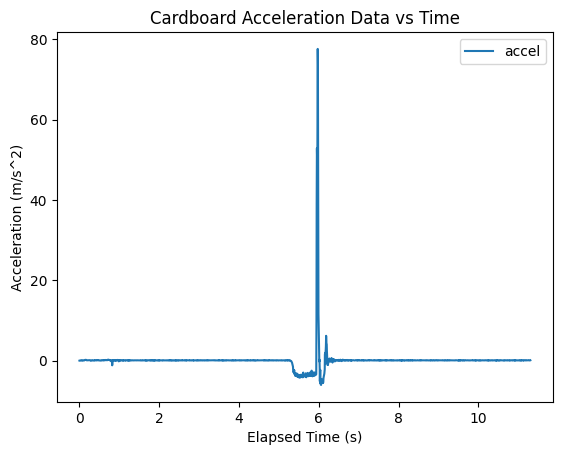

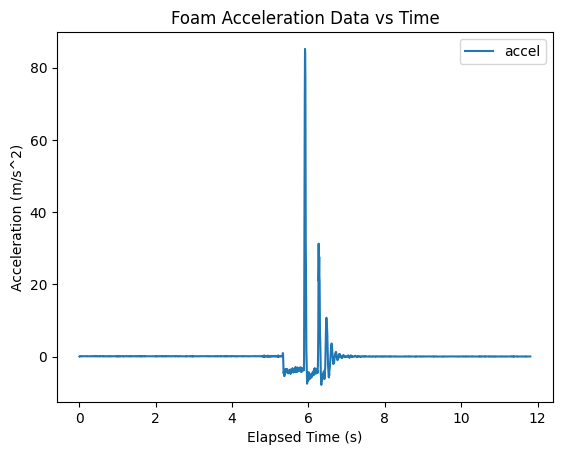

In [ ]:
cardboard_df.plot(x="elapsed (s)", y = "accel")
plt.title("Cardboard Acceleration Data vs Time")
plt.xlabel("Elapsed Time (s)")
plt.ylabel("Acceleration (m/s^2)")
plt.show

foam_df.plot("elapsed (s)", "accel")
plt.title("Foam Acceleration Data vs Time")
plt.xlabel("Elapsed Time (s)")
plt.ylabel("Acceleration (m/s^2)")
plt.show

## Drifted Velocity Calculation

In [ ]:
# drifted velocity calculation
cardboard_df["v"] = cardboard_df["a_t"].cumsum()
foam_df["v"] = foam_df["a_t"].cumsum()

<function matplotlib.pyplot.show(close=None, block=None)>

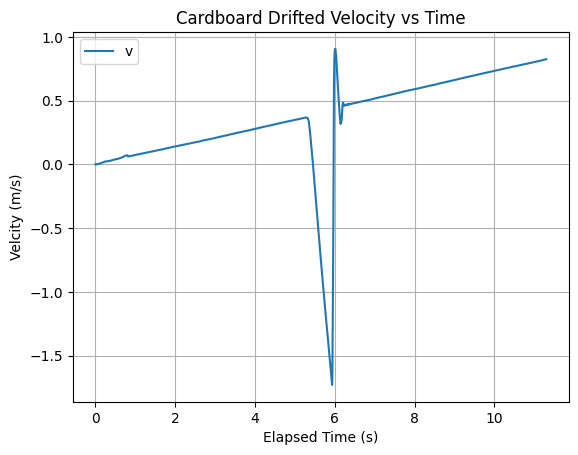

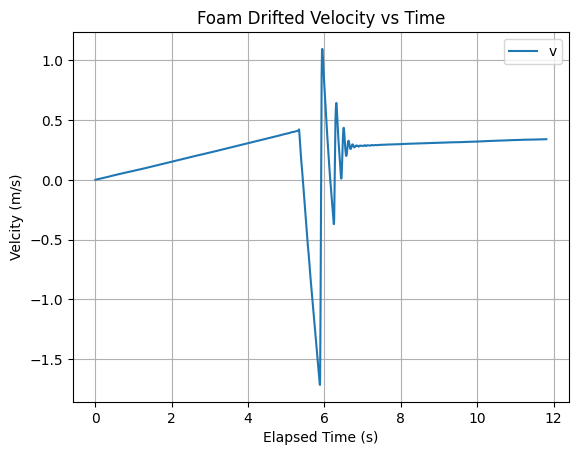

In [ ]:
cardboard_df.plot(x="elapsed (s)", y = "v")
plt.title("Cardboard Drifted Velocity vs Time")
plt.xlabel("Elapsed Time (s)")
plt.ylabel("Velcity (m/s)")
plt.grid()
plt.show

foam_df.plot(x="elapsed (s)", y = "v")
plt.title("Foam Drifted Velocity vs Time")
plt.xlabel("Elapsed Time (s)")
plt.ylabel("Velcity (m/s)")
plt.grid()
plt.show

In [ ]:
# finding drift slope
x2 = 10.018
y2 = 0.7017583499999857
x1 = 7.032
y1 = 0.48765510000000245

cardboard_slope = (y2-y1)/(x2-x1)

x3 = 0.619
y3 = 0.0474804
x4 = 5.027
y4 = 0.38772063000000195
foam_slope_1 = (y4-y3)/(x4-x3)

x5 = 8.805
y5 = 0.30691565999999953
x6 = 11.806
y6 = 0.3396810599999988
foam_slope_2 = (y6-y5)/(x6-x5)

## Removing Drift from Velocity

In [ ]:
#Remove drift from velocity

cardboard_df["vi"] = cardboard_df["v"] - (cardboard_slope*cardboard_df["elapsed (s)"])

maxPeakIdx = foam_df["v"].idxmax()
foam_df.loc[:maxPeakIdx, "noDriftV"] = foam_df["v"] - foam_df["elapsed (s)"] * foam_slope_1
foam_df.loc[maxPeakIdx:, "noDriftV"] = foam_df["v"] - foam_df["elapsed (s)"] * foam_slope_2 - 0.22

<function matplotlib.pyplot.show(close=None, block=None)>

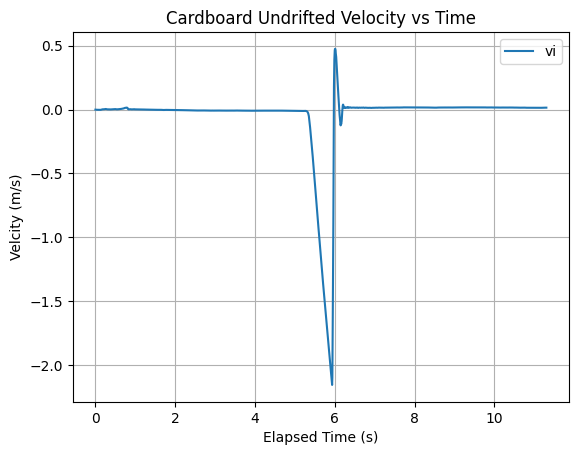

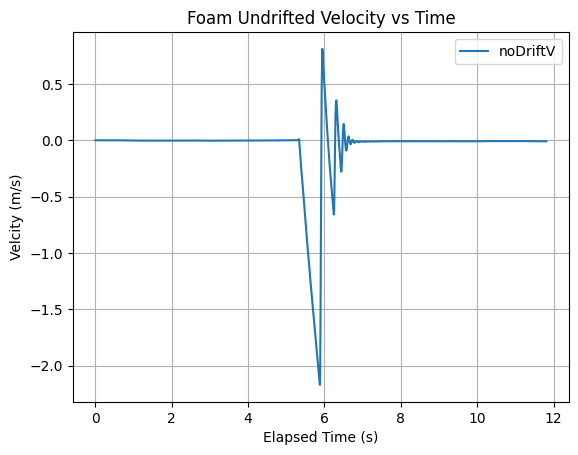

In [ ]:
cardboard_df.plot(x="elapsed (s)", y = "vi")
plt.title("Cardboard Undrifted Velocity vs Time")
plt.xlabel("Elapsed Time (s)")
plt.ylabel("Velcity (m/s)")
plt.grid(True)
plt.show

foam_df.plot("elapsed (s)", "noDriftV")
plt.title("Foam Undrifted Velocity vs Time")
plt.xlabel("Elapsed Time (s)")
plt.ylabel("Velcity (m/s)")
plt.grid(True)
plt.show

In [ ]:
cardboard_impact = cardboard_df["accel"].idxmax()
cardboard_interval_df = cardboard_df[:1070]
cardboard_begin = cardboard_df.loc[cardboard_df["z-axis (g)"] == 0.486].index

cardboard_avgAccel = cardboard_df.loc[1035:cardboard_impact].mean()
print("Average acceleration for cardboard until impact is ", cardboard_avgAccel["accel"], "m/s^2")

foam_impact = foam_df["accel"].idxmax()
foam_interval_df = foam_df[:1035]
foam_begin = foam_df.loc[foam_df["z-axis (g)"] == 0.522].index

foam_avgAccel = foam_df.loc[1035:foam_impact].mean()
print("Average acceleration until impact for foam is ", foam_avgAccel["accel"], "m/s^2")

Average acceleration for cardboard until impact is  -0.5176858823529408 m/s^2
Average acceleration until impact for foam is  -1.0448002877697846 m/s^2


## Velocity Calculation at Any Give Time

In [ ]:
time = input("time to get velocity for cardboard: ")
cardboard_v=np.interp(time, cardboard_df["elapsed (s)"],cardboard_df["vi"])

foam_time = input("time to get velocity foam: ")
foam_v=np.interp(foam_time, foam_df["elapsed (s)"],foam_df["noDriftV"])

print (cardboard_v, foam_v)

time to get velocity for cardboard: 2
time to get velocity foam: 2
-0.0030530520361574283 -0.002505360054447227


## Max and Min of Graph

In [ ]:
max_velocity_before = cardboard_df["vi"].min()
max_velocity_after = cardboard_df["vi"].max()
max_velocity_before, max_velocity_after

(-2.155769610281279, 0.4752306397254082)

<function matplotlib.pyplot.show(close=None, block=None)>

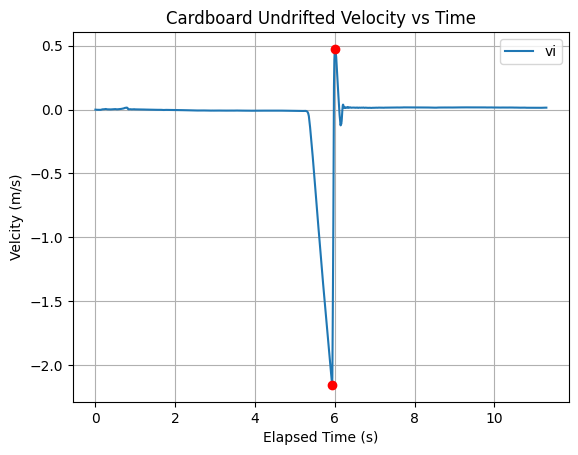

In [ ]:
#Cardboard:
t_max_v_before = cardboard_df.loc[cardboard_df["vi"]==max_velocity_before, "elapsed (s)"]
t_max_v_after = cardboard_df.loc[cardboard_df["vi"]==max_velocity_after, "elapsed (s)"]

x1 = [t_max_v_after]
y1 = [max_velocity_after]

x2 = [t_max_v_before]
y2 = [max_velocity_before]
cardboard_df.plot(x="elapsed (s)", y = "vi")

plt.plot(x1,y1, 'ro')
plt.plot(x2,y2, 'ro')

plt.title("Cardboard Undrifted Velocity vs Time")
plt.xlabel("Elapsed Time (s)")
plt.ylabel("Velcity (m/s)")
plt.grid()
plt.show

In [ ]:
max_velocity_before = foam_df["noDriftV"].min()
max_velocity_after = foam_df["noDriftV"].max()
max_velocity_before, max_velocity_after

(-2.170643539900183, 0.8103399033155654)

1168    5.884
Name: elapsed (s), dtype: float64

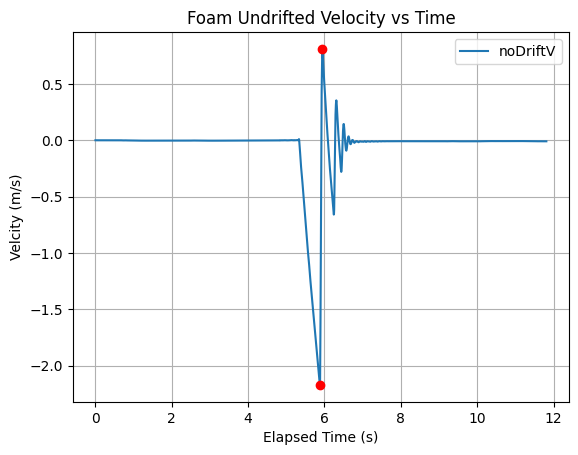

In [ ]:
# Foam
t_max_v_before = foam_df.loc[foam_df["noDriftV"]== max_velocity_before, "elapsed (s)"]
t_max_v_after = foam_df.loc[foam_df["noDriftV"]== max_velocity_after, "elapsed (s)"]

x1 = [t_max_v_after]
y1 = [max_velocity_after]

x2 = [t_max_v_before]
y2 = [max_velocity_before]
foam_df.plot(x="elapsed (s)", y = "noDriftV")

plt.plot(x1,y1, 'ro')
plt.plot(x2,y2, 'ro')



# plt.axis([4.5,7.5, -2.5, 1])

plt.title("Foam Undrifted Velocity vs Time")
plt.xlabel("Elapsed Time (s)")
plt.ylabel("Velcity (m/s)")
plt.grid()
plt.show

t_max_v_before